# SEABORN

Antes de comenzar a escribir su código, asegúrese de importar las bibliotecas necesarias de la siguiente manera:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#puedo definir un style
sns.set(style="darkgrid")

Tenga en cuenta que el atributo de estilo también es personalizable y puede tomar cualquier valor, como darkgrid, ticks, etc., que discutiré más adelante en la sección de estética de la trama. Veamos ahora un pequeño ejemplo:

In [2]:
#pd.read_csv("todos.csv")
f = sns.load_dataset("flights")
f.head()
f

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


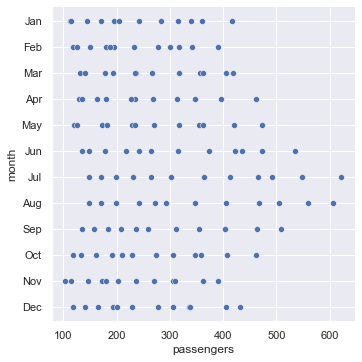

In [3]:
sns.relplot(x="passengers", y="month", data=f);

Como puede ver, los puntos se trazan en 2 dimensiones. Sin embargo, puede agregar otra dimensión utilizando la semántica "tono"="hue". Echemos un vistazo a un ejemplo del mismo:

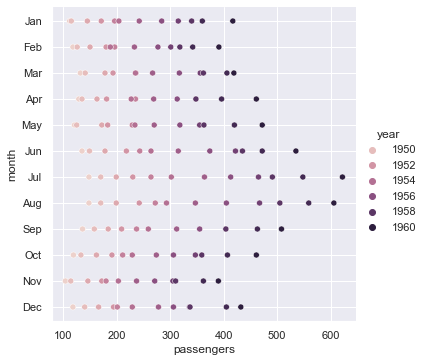

In [4]:
f = sns.load_dataset("flights")
sns.relplot(x="passengers", y="month", hue="year", data=f);


Sin embargo, hay muchas más personalizaciones que puede probar, como colores, estilos, tamaño, etc. Permítame mostrarle cómo puede cambiar el color en el siguiente ejemplo:

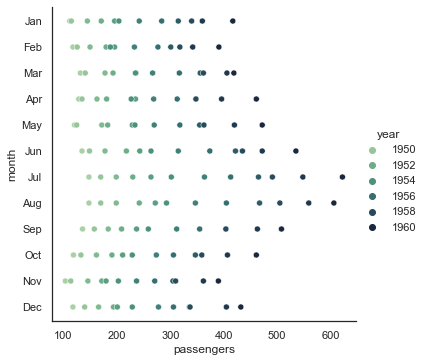

In [18]:
sns.set(style="white")
f = sns.load_dataset("flights")
sns.relplot(x="passengers", y="month", hue="year", palette="ch:r=-.5,l=.75", data=f);

* lineplot():

Esta función le permitirá dibujar una línea continua para sus datos. Puede utilizar esta función cambiando el parámetro "kind" ("tipo") de la siguiente manera:

In [15]:
a=pd.DataFrame({'Día':[1,2,3,4,5,6,7],'Comestibles':[30,80,45,23,51,46,76],'Ropa':[13,40,34,23,54,67,98],'Utensilios':[12,32,27,56,87,54,34]},index=[1,2,3,4,5,6,7])
a

,Día,Comestibles,Ropa,Utensilios
1,1,30,13,12
2,2,80,40,32
3,3,45,34,27
4,4,23,23,56
5,5,51,54,87
6,6,46,67,54
7,7,76,98,34


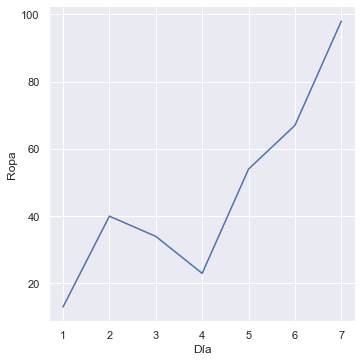

In [13]:
g = sns.relplot(x="Día", y="Ropa", kind="line", data=a)
g

El valor predeterminado de la gráfica de línea es y en función de x. Sin embargo, se puede cambiar si lo desea. Hay muchas más opciones que puede probar más a fondo.

Ahora echemos un vistazo a cómo trazar datos categóricos.

# Graficando datos categóricos:
Este enfoque entra en escena cuando nuestra variable principal se divide en grupos discretos (categóricos). Esto se puede lograr utilizando la función catplot().

* catplot():
Es una función de figura de niveles como relplot(). Se puede caracterizar por tres familias de funciones de nivel de ejes:

Scatterplots – Estos incluyen stripplot(), swarmplot()

Distribution Plots – los cuales son boxplot(), violinplot(), boxenplot()

Estimateplots – llamados pointplot(), barplot(), countplot()

Tomemos ahora algunos ejemplos para demostrar esto:

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
a = sns.load_dataset("tips")
a.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
a.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [26]:
a.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

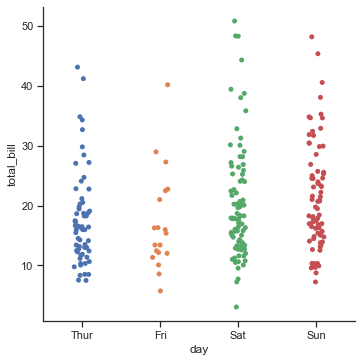

In [27]:
sns.catplot(x="day", y="total_bill", data=a);

Como puede ver, en el ejemplo anterior no configuré el parámetro "kind". Por lo tanto, ha devuelto el gráfico como diagrama de dispersión predeterminado. Puede especificar cualquiera de las funciones de nivel de ejes para cambiar el gráfico según sea necesario. Tomemos un ejemplo de esto también:

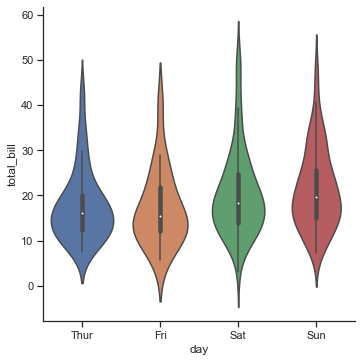

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
a = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", kind="violin", data=a);

In [29]:
day_order=a["day"].unique()
day_order

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

La salida anterior muestra la trama de violín para el conjunto de datos de puntas. Ahora intentemos encontrar cómo visualizar la distribución de un conjunto de datos.

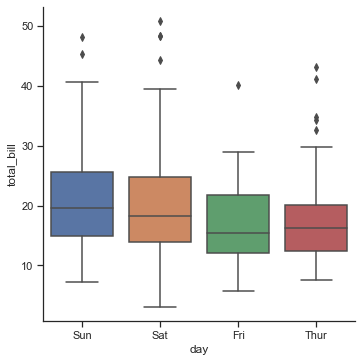

In [30]:
# Especificando el orden de la categoría
day_order = ["Sun", "Sat", 
                    "Fri", "Thur"]

# Crear un catplot 
sns.catplot(x='day', y='total_bill',
            data=a,
            kind="box",
            order=day_order);

# Boxplot
El Diagrama de Caja y bigotes (box and whisker plot en inglés ) es un tipo de gráfico que muestra un resumen de una gran cantidad de datos en cinco medidas descriptivas, además de intuir su morfología y simetría.

Este tipo de gráficos nos permite identificar valores atípicos y comparar distribuciones. Además de conocer de una forma cómoda y rápida como el 50% de los valores centrales se distribuyen.

Definiciones previas
Se puede detectar rápidamente los siguientes valores:

Primer cuartil: el 25% de los valores son menores o igual a este valor.
Mediana o Segundo Cuartil: Divide en dos partes iguales la distribución. De forma que  el 50% de los valores son menores o igual a este valor.
Tercer cuartil: el 75% de los valores son menores o igual a este valor .
Rango Intercuartílico (RIC): Diferencia entre el valor del tercer cuartil y el primer cuartil.

No es de extrañar que en un conjunto de datos reales se muestren máximos muy altos o mínimos muy bajos por lo que se considera que existen los valores raros.


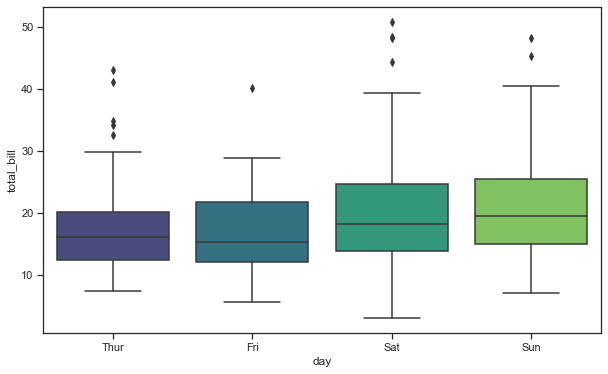

In [31]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=a, x = 'day', y = 'total_bill', palette = 'viridis')
plt.show()

### Matriz de correlación. Heatmap.
La matriz de correlación muestra la relación de cada variable con la forma matricial. Seaborn tiene una buena herramienta para trazarlo usando un mapa de calor.

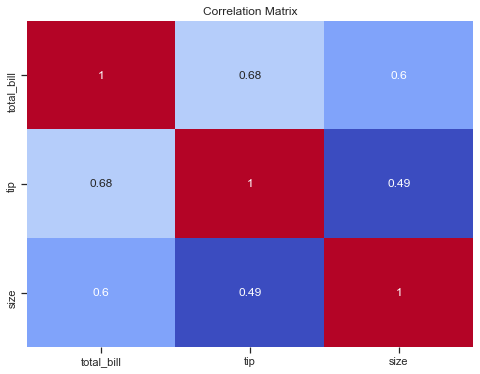

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cbar=False,annot=True,data=a.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
df = pd.read_csv('housing.csv')
df = df.dropna()
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


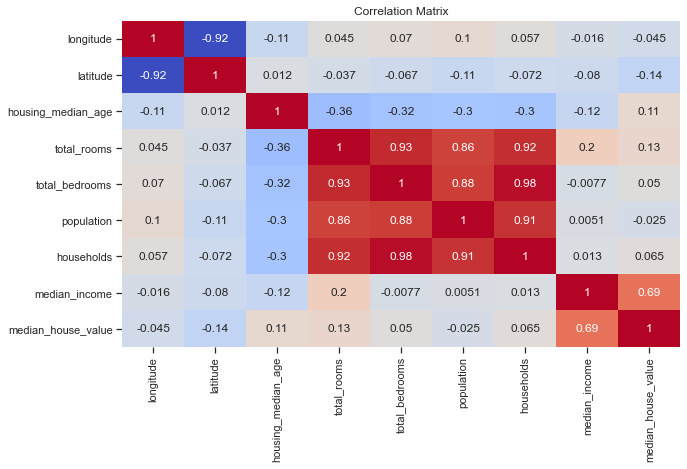

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(cbar=False,annot=True,data=df.corr(),cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Si el valor es cercano a 1, significa que la variable está correlacionada positivamente con la observación. y cuando la observación aumenta, entonces la variable tiene una alta probabilidad de aumentar. y viceversa.

*Countplot()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


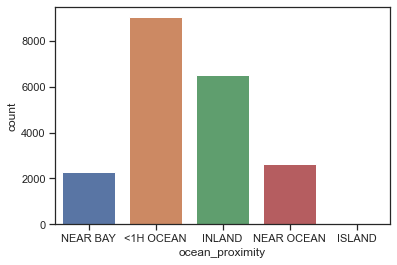

In [37]:
# Create a count plot of school with location subgroups
sns.countplot('ocean_proximity', data=df );

# Visualizando la distribución del conjunto de datos:

Básicamente, se trata de comprender los conjuntos de datos con contexto para que sean univariados o bivariados. Antes de comenzar con esto, solo importe lo siguiente:

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

Una vez hecho esto, puede continuar trazando distribuciones univariadas y bivariadas.

Graficando distribuciones univariadas:

Para trazarlas, puede hacer uso de la función distplot () de la siguiente manera:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


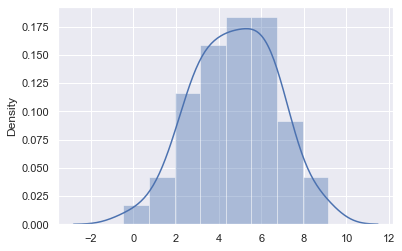

In [39]:
a = np.random.normal(loc=5,size=100,scale=2)
a
sns.distplot(a);

Como puede ver en el ejemplo anterior, hemos trazado un gráfico para la variable a cuyos valores son generados por la función normal () usando distplot.

Trazado de distribuciones bivariadas:

Esto entra en escena cuando tienes dos variables independientes aleatorias que dan como resultado algún evento probable. La mejor función para trazar este tipo de gráficos es jointplot (). Tracemos ahora un gráfico bivariado usando jointplot () .

IndexError: arrays used as indices must be of integer (or boolean) type

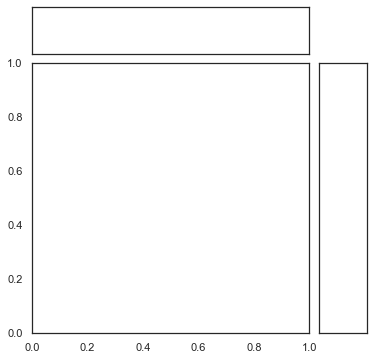

In [42]:
x=pd.DataFrame({'Day':[1,2,3,4,5,6,7],'Grocery':[30,80,45,23,51,46,76],'Clothes':[13,40,34,23,54,67,98],'Utensils':[12,32,27,56,87,54,34]},index=[1,2,3,4,5,6,7])
y=pd.DataFrame({'Day':[8,9,10,11,12,13,14],'Grocery':[30,80,45,23,51,46,76],'Clothes':[13,40,34,23,54,67,98],'Utensils':[12,32,27,56,87,54,34]},index=[8,9,10,11,12,13,14])
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
with sns.axes_style("white"):
    sns.jointplot(x=data,y=data, kind="hist", color="b", data=data);

Ahora que ha entendido las diversas funciones en Python Seaborn, pasemos a construir cuadrículas estructuradas multi-plot grids.

# Multi-Plot Grids:
Python Seaborn le permite trazar múltiples cuadrículas una al lado de la otra. Estos son básicamente diagramas o gráficos que se trazan utilizando la misma escala y ejes para ayudar a la comparación entre ellos. Esto, a su vez, ayuda al programador a diferenciar rápidamente entre los gráficos y obtener grandes cantidades de información.

Considere el siguiente ejemplo de la función facetgrid () para trazar estos gráficos.

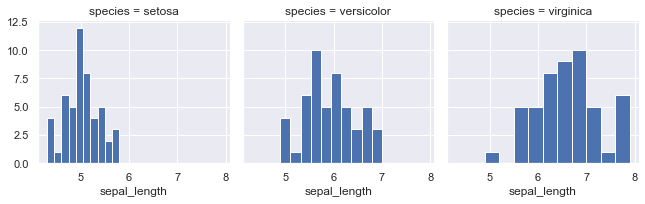

In [17]:
sns.set(style="darkgrid")
a = sns.load_dataset("iris")
a
b = sns.FacetGrid(a, col="species")
b
b.map(plt.hist, "sepal_length");
plt.savefig("facet.png", dpi=300)

In [45]:
a = sns.load_dataset("iris")
a
a.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

El resultado anterior muestra claramente la comparación entre las propinas que se dan durante el almuerzo y la cena. También puede trazar usando la función PairGrid cuando tiene un par de variables para comparar. Considere el siguiente ejemplo.

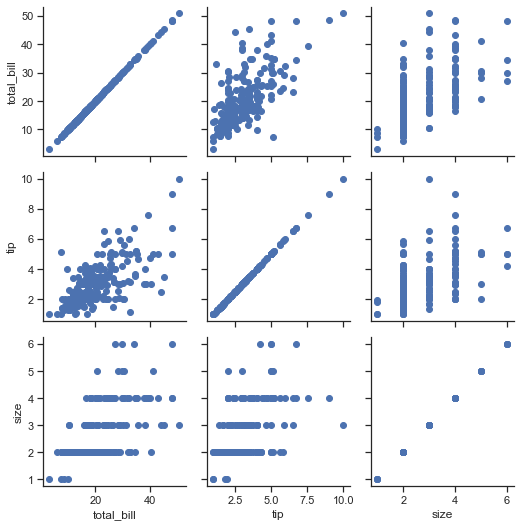

In [47]:
sns.set(style="ticks")
a = sns.load_dataset("tips")
b = sns.PairGrid(a)
b
b.map(plt.scatter);

In [ ]:
a.head()

Como puede ver, el resultado anterior se compara claramente entre el año y el número de pasajeros de diferentes maneras.

Seaborn también permite personalizaciones con respecto a la estética, que se analiza más a fondo..

# Plot-Aesthetics:

Este segmento del tutorial de Python Seaborn trata de hacer nuestros gráficos más atractivos y encantadores.

Estética de la figura de Python Seaborn:
La primera función que discutiré es set (). He estado usando el parámetro "style" de esta función antes. Este parámetro se ocupa básicamente de temas relacionados con seaborn. En la actualidad, hay cinco de ellos disponibles: darkgrid, ticks, whitegrid, white y dark.

Considere el siguiente ejemplo que demuestra el tema blanco.


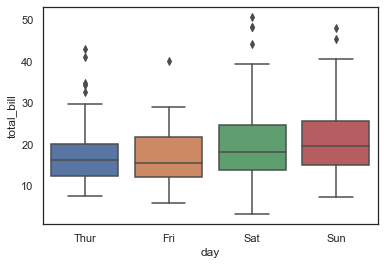

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
a = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=a);

En la salida anterior, puede notar que el tema cambia a blanco. También puede explorarlos más a fondo utilizando los otros temas. Si observa en la salida anterior, hay ejes presentes alrededor del gráfico. Sin embargo, esto también se puede personalizar usando la función despine (). Mira el ejemplo de abajo.

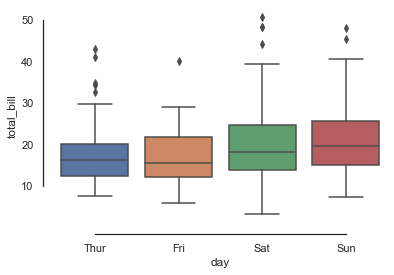

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
a = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=a);
sns.despine(offset=10, trim=True);

* Agregando títulos

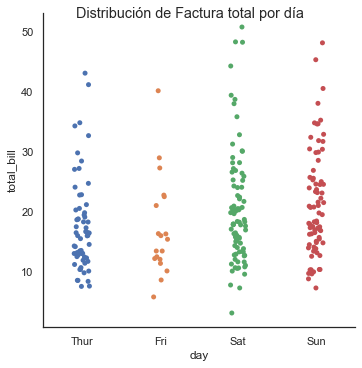

In [50]:
g=sns.catplot(x="day", y="total_bill", data=a);

g.fig.suptitle(" Distribución de Factura total por día");

Ten en cuenta la diferencia entre las dos salidas anteriores. Sin embargo, hay muchas más opciones que puedes explorar por ti mismo.

Paletas de colores de Python Seaborn:
El color es básicamente la característica que se acerca a los ojos humanos más allá de cualquier otra característica. Seaborn te permite jugar con colores usando varias funciones como color_palette (), hls_palette (), husl_palette (), etc. Echa un vistazo a los colores que están presentes actualmente en seaborn.


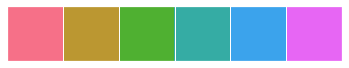

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
 
presentcolors = sns.husl_palette()
sns.palplot(presentcolors)

La imagen de arriba muestra los colores que están presentes en seaborn. Lo he hecho usando la función palplot (). Para variaciones más profundas, puede usar hls_palette (), husl_palette (), etc.

Esto nos lleva al final del Tutorial de Python Seaborn. Espero que hayas entendido todo claramente. Asegúrate de practicar tanto como puedas.

